# Imports

In [1]:
import os
import sys
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data

In [2]:
nvars = ['1V', '2V']
cases = ['ind', 'com']
operations = ['OR', 'AND', 'XOR']

names = []

In [3]:
FILES_PATH = 'results/simulation'
FILES = os.listdir('results/simulation')

In [4]:
FILES_NAMES = dict()

for nvar in nvars:
    for case in cases:
        file_title = 'Simulation' + nvar + '_' + case
        if nvar == '2V':
            for operation in operations:
                file_title = 'Simulation' + nvar + '_' + operation + '_' + case
                FILES_NAMES[file_title] = [file_names for file_names in FILES if file_names.startswith(file_title)]
        else:
            FILES_NAMES[file_title] = [file_names for file_names in FILES if file_names.startswith(file_title)]

In [5]:
DATA = dict()

for dataset in FILES_NAMES.keys():
    DATA[dataset] = dict()
    for file_name in FILES_NAMES[dataset]:
        with open(FILES_PATH + '/' + file_name, 'rb') as f:
            table = pickle.load(f)
            try:
                for metric in table.keys():
                    for model in table[metric].keys():
                        DATA[dataset][metric][model].append(table[metric][model])
            except:
                for key in table.keys():
                    DATA[dataset][metric] = dict()
                    for model in table[metric].keys():
                        DATA[dataset][metric][model] = [table[metric][model]]


# Figures for MPs

In [6]:
name1 = 'RW_logreg'
name2 = 'pir'
name3 = 'RW_pir'

COUPLE_SEP = dict()

COUPLE_SEP[name1] = DATA['Simulation1V_ind']['separation'][name1]
COUPLE_SEP[name2] = DATA['Simulation1V_ind']['separation'][name2]
COUPLE_SEP[name3] = DATA['Simulation1V_com']['separation'][name3]

In [7]:
COUPLE_ACC = dict()

COUPLE_ACC[name1] = DATA['Simulation1V_ind']['acc'][name1]
COUPLE_ACC[name2] = DATA['Simulation1V_ind']['acc'][name2]
COUPLE_ACC[name3] = DATA['Simulation1V_com']['acc'][name3]

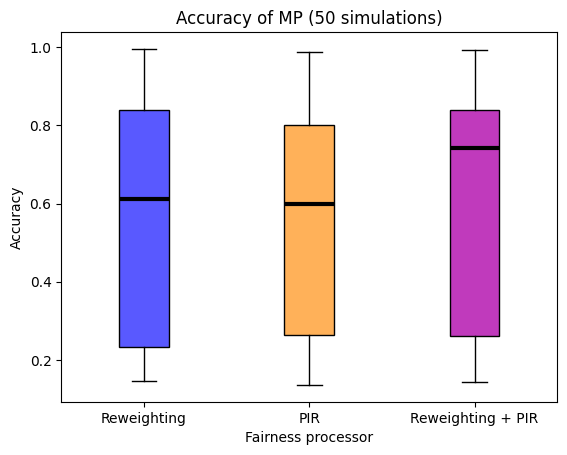

In [8]:
fig, ax = plt.subplots()

bp = ax.boxplot(COUPLE_ACC.values(), patch_artist=True)

ax.set_xticklabels(['Reweighting', 'PIR', 'Reweighting + PIR'])
ax.set_xlabel('Fairness processor')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of MP (50 simulations)')

colors = [
    [0, 0, 255/255, 0.65],
    [255/255, 136/255, 0, 0.65], 
    [178/255, 14/255, 173/255, 0.82]
         ]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color = 'black', linewidth = 3)

plt.show()
fig.savefig('results/Figures/boxplots/AccMP.png')

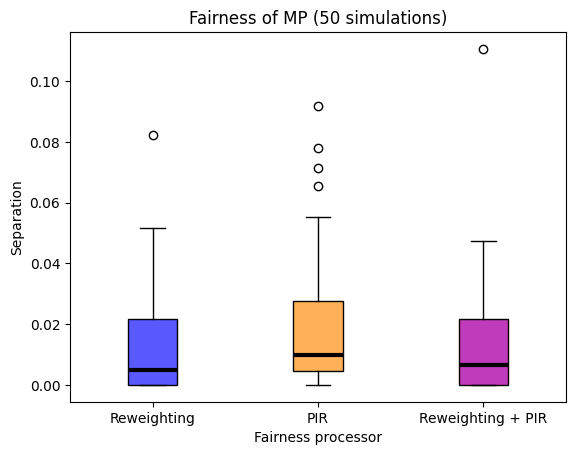

In [9]:
fig, ax = plt.subplots()

bp = ax.boxplot(COUPLE_SEP.values(), patch_artist = True)

ax.set_xticklabels(['Reweighting', 'PIR', 'Reweighting + PIR'])
ax.set_xlabel('Fairness processor')
ax.set_ylabel('Separation')
ax.set_title('Fairness of MP (50 simulations)')

colors = [
    [0, 0, 255/255, 0.65],
    [255/255, 136/255, 0, 0.65], 
    [178/255, 14/255, 173/255, 0.82]
         ]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color = 'black', linewidth = 3)

plt.show()
fig.savefig('results/Figures/boxplots/FairMP.png')

# Figures of LP

In [10]:
model = 'logreg_RejOpt_spd'

name1 = '1V_ind'
name2 = '2V_OR_ind'
name3 = '2V_AND_ind'
name4 = '2V_XOR_ind'

LP_SEP = dict()

LP_SEP[name1] = DATA['Simulation1V_ind']['separation'][model]
LP_SEP[name2] = DATA['Simulation2V_OR_ind']['separation'][model]
LP_SEP[name3] = DATA['Simulation2V_AND_ind']['separation'][model]
LP_SEP[name4] = DATA['Simulation2V_XOR_ind']['separation'][model]

In [11]:
LP_ACC = dict()

LP_ACC[name1] = DATA['Simulation1V_ind']['acc'][model]
LP_ACC[name2] = DATA['Simulation2V_OR_ind']['acc'][model]
LP_ACC[name3] = DATA['Simulation2V_AND_ind']['acc'][model]
LP_ACC[name4] = DATA['Simulation2V_XOR_ind']['acc'][model]

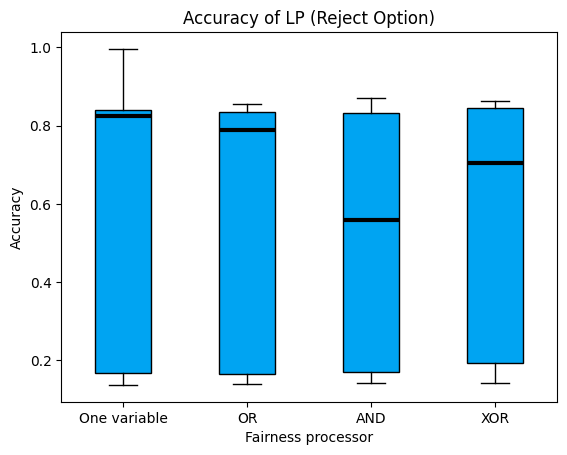

In [12]:
fig, ax = plt.subplots()

bp = ax.boxplot(LP_ACC.values(), patch_artist = True)

ax.set_xticklabels(['One variable', 'OR', 'AND', 'XOR'])
ax.set_xlabel('Fairness processor')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of LP (Reject Option)')

colors = [
    [0, 164/255, 242/255, 1],
    [0, 164/255, 242/255, 1], 
    [0, 164/255, 242/255, 1],
    [0, 164/255, 242/255, 1]
         ]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color = 'black', linewidth = 3)

plt.show()
fig.savefig('results/Figures/boxplots/AccLP.png')

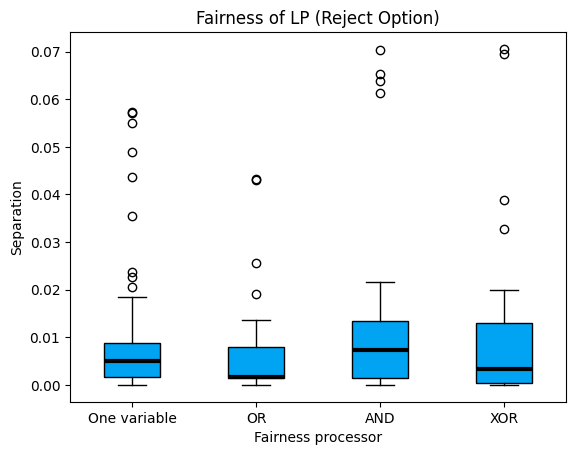

In [13]:
fig, ax = plt.subplots()

bp = ax.boxplot(LP_SEP.values(), patch_artist = True)

ax.set_xticklabels(['One variable', 'OR', 'AND', 'XOR'])
ax.set_xlabel('Fairness processor')
ax.set_ylabel('Separation')
ax.set_title('Fairness of LP (Reject Option)')

colors = [
    [0, 164/255, 242/255, 1],
    [0, 164/255, 242/255, 1], 
    [0, 164/255, 242/255, 1],
    [0, 164/255, 242/255, 1]
         ]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for median in bp['medians']:
    median.set(color = 'black', linewidth = 3)

plt.show()
fig.savefig('results/Figures/boxplots/FairLP.png')

# Median results

In [14]:
# Name of the processors
preproc = ['RW', 'DI']
inproc = ['metafair', 'pir', 'adversarial']
postproc = ['Platt', 'eqOdds', 'RejOpt']
proc = preproc + inproc + postproc

# Names that should be used in case one method appears individually (i.e. we put logistic regreesion for pre processors)
default_labels = {
    'RW': 'RW_logreg',
    'DI': 'DI_logreg',
    'adversarial': 'adversarial',
    'metafair': 'metafair_sr',
    'pir': 'pir',
    'Platt': 'Platt',
    'eqOdds': 'eqOdds',
    'RejOpt': 'RejOpt_spd'
    }


def combination_matrix(resultsInd: pd.DataFrame, resultsCom: pd.DataFrame) -> dict[pd.DataFrame]:
    """
    Store results of individual and combined performance in the same data frame
    ======================================================================================================
    Inputs:
        resultsInd (pd.DataFrame): Data frame that stores the results of the individual methods.
        resultsCom (pd.DataFrame): Data frame that stores the results of the MP processors.

    Outputs:
        matrices (dict): dictionary whose entries are a data frame for each metric which stores the combined
            results for each one.
    """

    # Create the dictinoary
    matrices = dict()
    # Select metrics
    metrics = ['acc', 'bal_acc', 'independence', 'separation', 'sufficiency']
    # Initialize the reuslts of each metric as an empty data frame
    for metric in metrics:
        matrices[metric] = pd.DataFrame(np.nan, index=proc, columns=proc)

    # Iterate to generate the matric
    for index1 in proc:
        for index2 in proc:
            # Illegal combinations:
            # We use this iteration to store the results of individual methods.
            # We store the results of index1.
            if \
                (index1 in preproc and index2 in preproc) or \
                (index1 in inproc and index2 in inproc) or \
                (index1 in postproc and index2 in postproc):

                # Select the correct name
                if index1 in postproc:
                    nameUse = 'logreg_' + default_labels[index1]
                else:
                    nameUse = default_labels[index1]

                # Store individual results
                for metric in metrics:
                    matrices[metric].loc[index1, index2] = resultsInd.loc[nameUse, metric]

            # Allowed combinations
            else:
                
                # If the entry is empty:
                if np.isnan(matrices[metric].loc[index1, index2]):
                    # Use the correct name
                    if (index1 in preproc and index2 in inproc):
                        method_name = index1 + '_' + index2
                    else:
                        method_name = default_labels[index1] + '_' + default_labels[index2]                    
                    
                    # Store the combined performance in [index1, index2] and [index2, index1].
                    for metric in metrics:
                        matrices[metric].loc[index1, index2] = resultsCom.loc[method_name, metric]
                        matrices[metric].loc[index2, index1] = resultsCom.loc[method_name, metric]
                    
    return matrices


def plot_heat_combination_matrix(resultsInd: pd.DataFrame, resultsCom: pd.DataFrame, metric: str):
    """
    Heatmap plot that shows the performance of the combination of methods
    ======================================================================================================
    Inputs:
        resultsInd (pd.DataFrame): Data frame that stores the results of the individual methods.
        resultsCom (pd.DataFrame): Data frame that stores the results of the MP processors.
        metric (str): Name of the metric we are interested in visualizing.

    Outputs:
        fig, ax (plt.figure, plt.axes): plt objects that store the plot we produce.
    """

    # Obtain the matrix with the joint performances and save the one we are interested in
    matrices = combination_matrix(resultsInd, resultsCom)
    matrix_metric = matrices[metric]

    # Create the figure
    fig, ax = plt.subplots()

    # Create the mask necessary to erase repeated results and illegal combinations (e.g. combinations of two pre processors)
    mask = np.triu(np.ones_like(matrix_metric, dtype=bool), k = 1)
    mask[0:2, 0:2] = True
    mask[2:5, 2:5] = True
    mask[5:, 5:] = True
    np.fill_diagonal(mask, False)

    # Create color map
    cmap = "mako"
    norm = plt.Normalize(vmin=0, vmax=1)

    # Create the heatmap
    sns.heatmap(
        matrix_metric,
        mask = mask,
        annot = True,
        fmt = "0.2f",
        linewidth=0.5,
        ax = ax,
        cmap = cmap,
        norm = norm
        )
    
    # Put labels and colorbar
    ax.set_xlabel("Fairness processor")
    ax.set_ylabel("Fairness processor")
    ax.collections[0].colorbar.set_label(metric)
    return fig, ax

In [15]:
metrics = ['independence', 'separation', 'sufficiency', 'acc', 'bal_acc']
not_finished = []
medianResults = dict()

for key in DATA.keys():
    if key in not_finished:
        pass
    else:
        medianResults[key] = pd.DataFrame(np.nan, index = DATA[key]['acc'].keys(), columns = metrics)
        for metric in metrics:
            medianResults[key][metric] = pd.DataFrame(DATA[key][metric]).median()

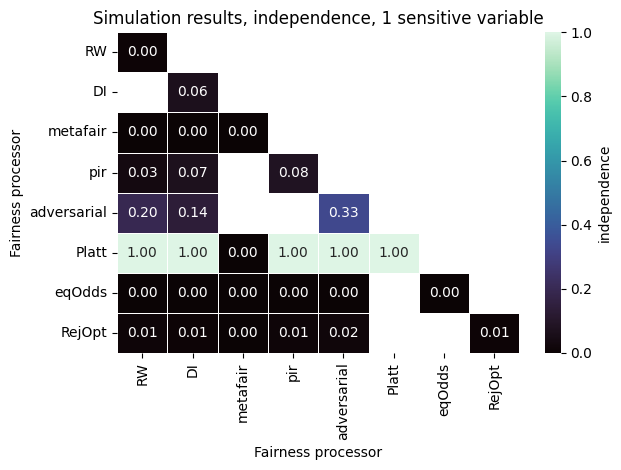

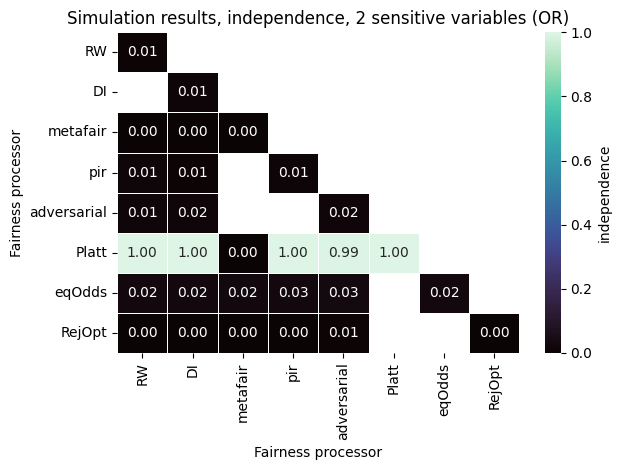

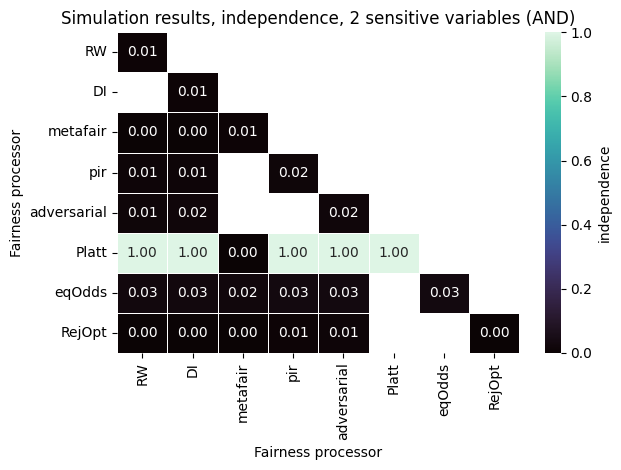

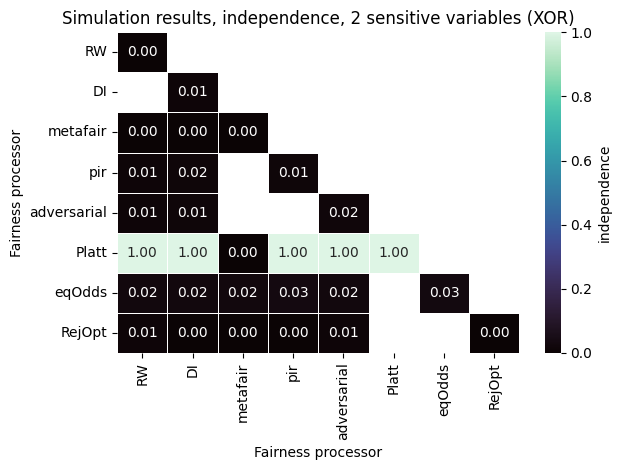

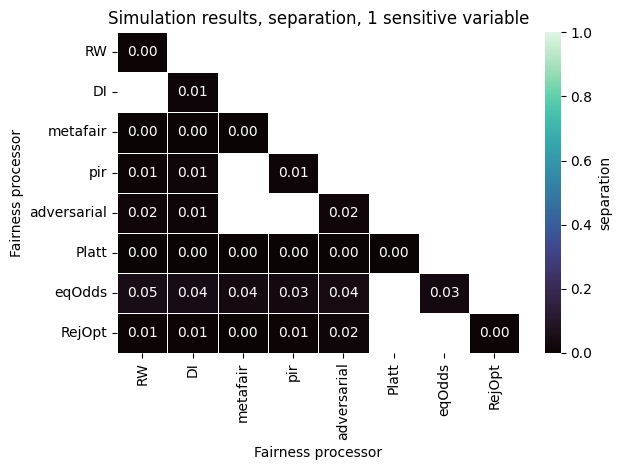

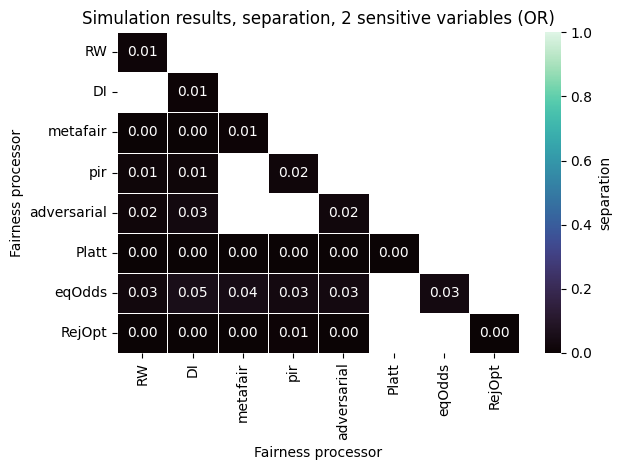

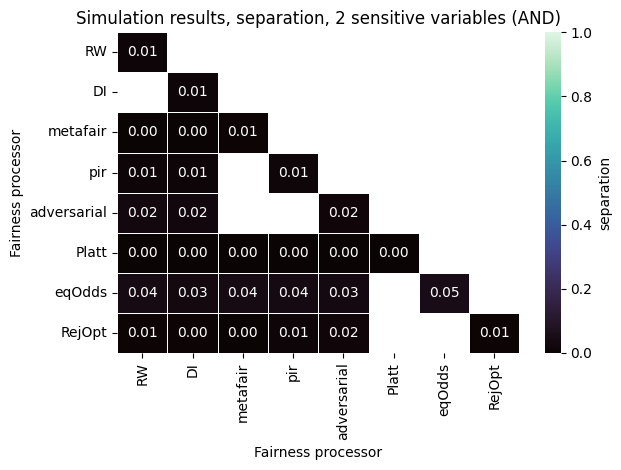

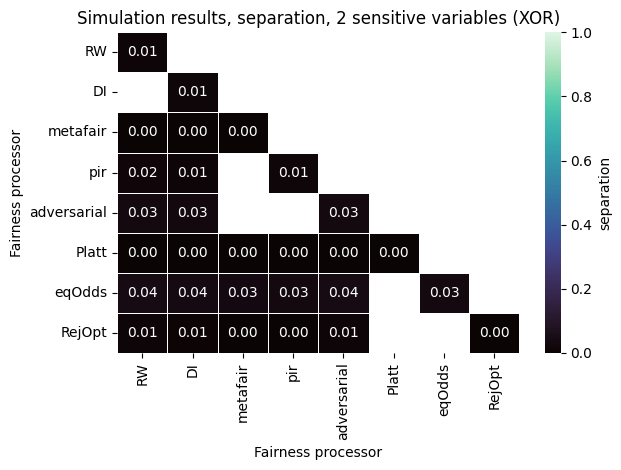

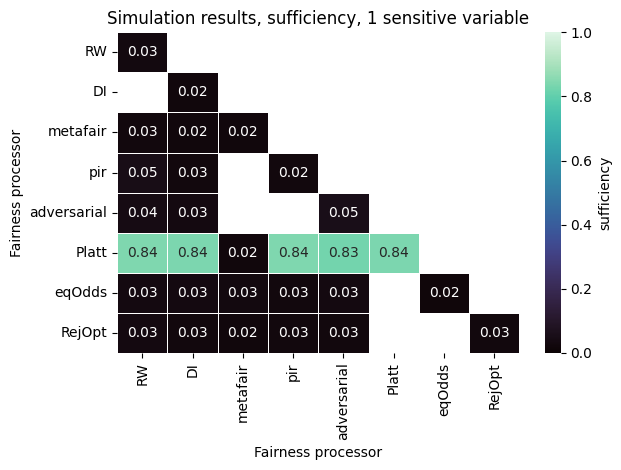

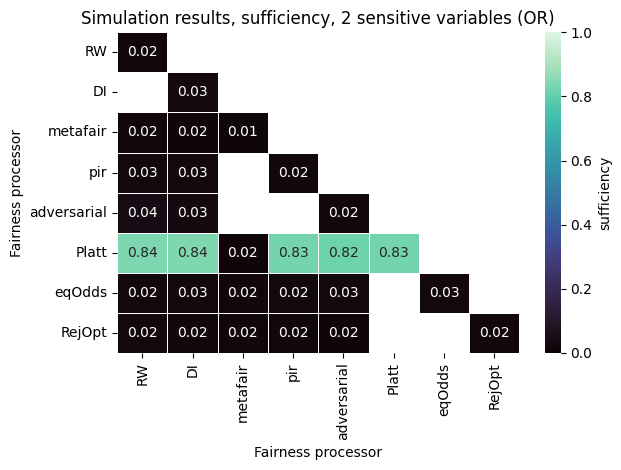

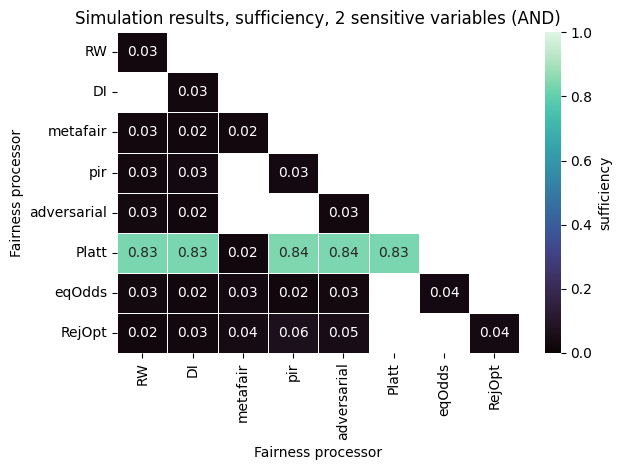

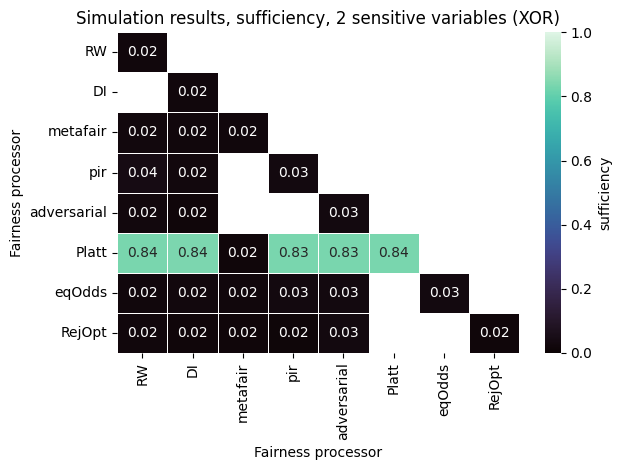

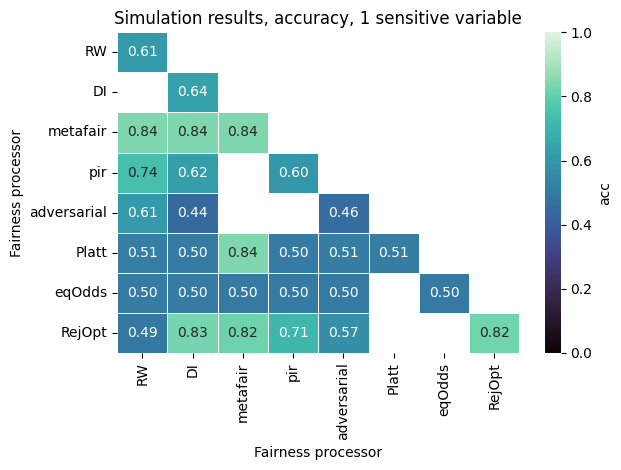

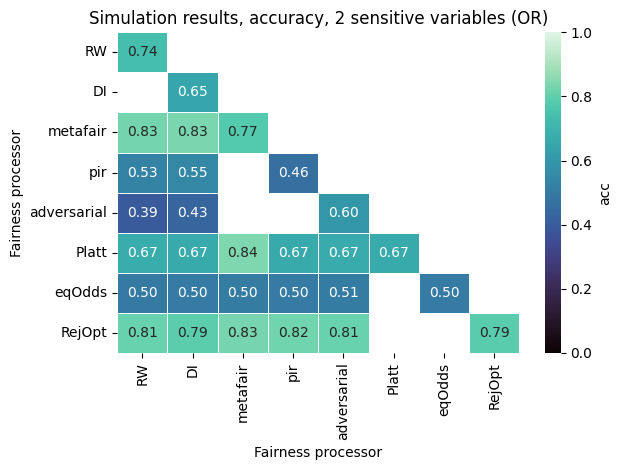

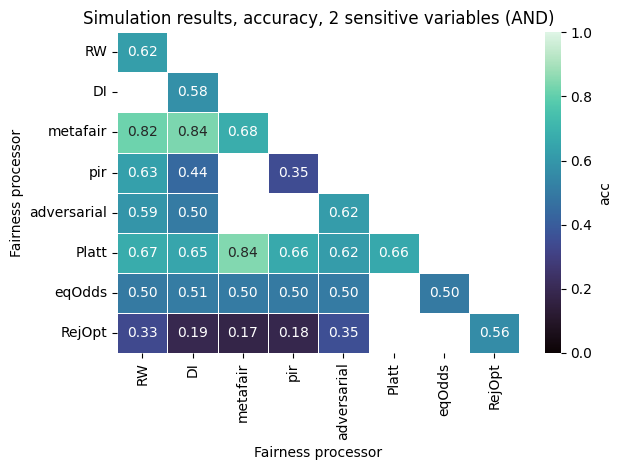

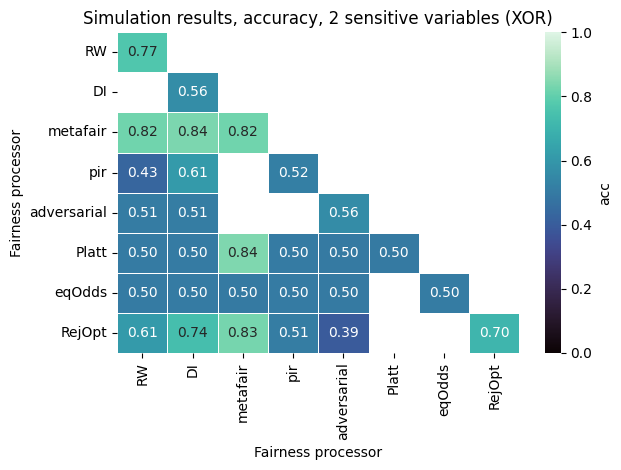

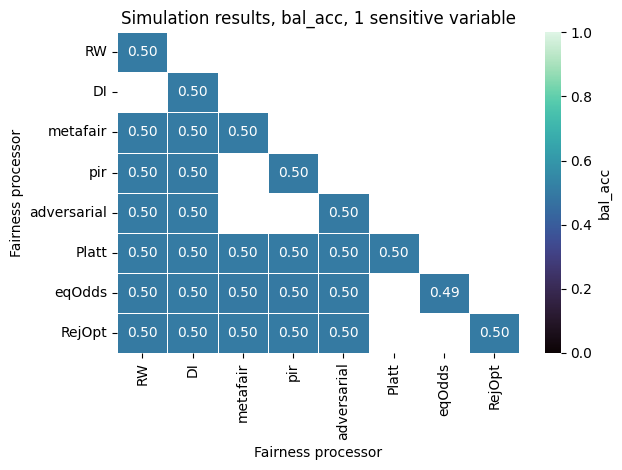

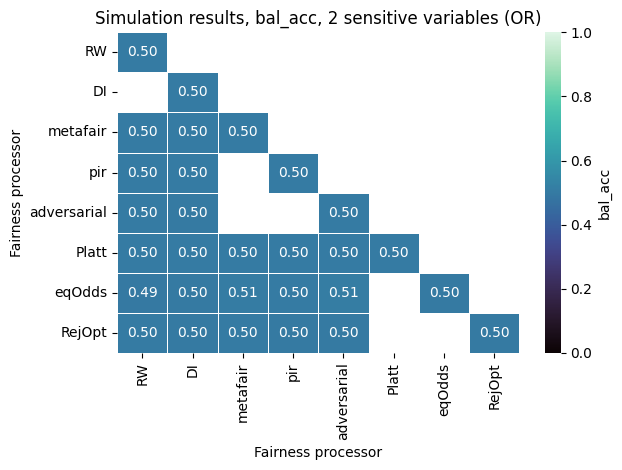

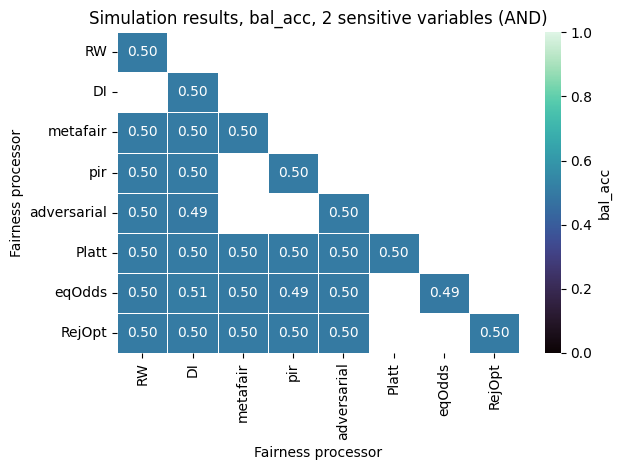

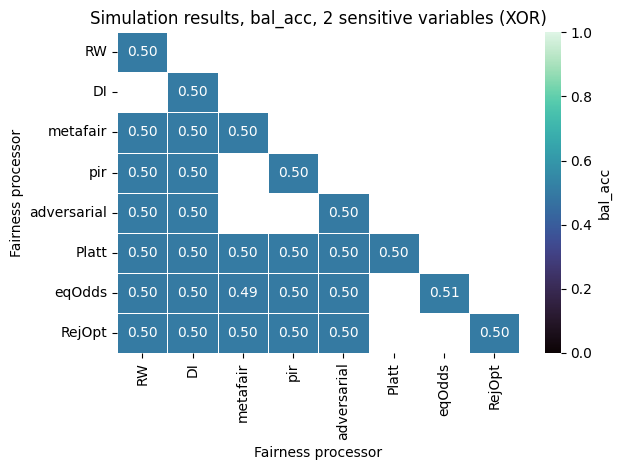

In [17]:
for metric in metrics:
    if metric == 'acc':
        metric_n = 'accuracy'
    else:
        metric_n = metric
    
    fig, ax = plot_heat_combination_matrix(medianResults['Simulation1V_ind'], medianResults['Simulation1V_com'], metric)
    ax.set_title("Simulation results, " + metric_n + ", 1 sensitive variable")
    plt.tight_layout()
    plt.show()
    fig.savefig('results/Figures/performance_matrix/' + metric + '/Median1V_' + metric + '.png')

    fig, ax = plot_heat_combination_matrix(medianResults['Simulation2V_OR_ind'], medianResults['Simulation2V_OR_com'], metric)
    ax.set_title("Simulation results, " + metric_n + ", 2 sensitive variables (OR)")
    plt.tight_layout()
    plt.show()
    fig.savefig('results/Figures/performance_matrix/' + metric + '/Median2V_OR' + metric + '.png')

    fig, ax = plot_heat_combination_matrix(medianResults['Simulation2V_AND_ind'], medianResults['Simulation2V_AND_com'], metric)
    ax.set_title("Simulation results, " + metric_n + ", 2 sensitive variables (AND)")
    plt.tight_layout()
    plt.show()
    fig.savefig('results/Figures/performance_matrix/' + metric + '/Median2V_AND' + metric + '.png')

    fig, ax = plot_heat_combination_matrix(medianResults['Simulation2V_XOR_ind'], medianResults['Simulation2V_XOR_com'], metric)
    ax.set_title("Simulation results, " + metric_n + ", 2 sensitive variables (XOR)")
    plt.tight_layout()
    plt.show()
    fig.savefig('results/Figures/performance_matrix/' + metric + '/Median2V_XOR' + metric + '.png')

In [20]:
import networkx as nx

def graph_visualization(resultsInd: pd.DataFrame, resultsCom: pd.DataFrame, metric: str, title: str = "", name_end: str = "") -> None:
    """
    Graph plot that shows a performance metric for all methods and combinations
    ======================================================================================================
    Inputs:
        resultsInd (pd.DataFrame): Data frame that stores the results of the individual methods.
        resultsCom (pd.DataFrame): Data frame that stores the results of the MP processors.
        metric (str): Name of the metric that will we plotted.
        title (str): Title of the plot.
        name_end (str): Name of the file in which the plot will be saved.

    Outputs:
        None
    """

    # Load the results and save the ones relevant to the metric we are interested in
    matrices = combination_matrix(resultsInd, resultsCom)
    matrix_metric = matrices[metric]

    # Create the figure
    plt.figure(figsize=(8, 6))
    
    # Create graph
    G = nx.Graph()

    # Add nodes and relationships
    proc = preproc + inproc + postproc
    combinations = [(node1, node2) for node1 in preproc for node2 in inproc]
    combinations += [(node1, node2) for node1 in preproc for node2 in postproc]
    combinations += [(node1, node2) for node1 in inproc for node2 in postproc]
    weights = [matrix_metric.loc[node1, node2] for (node1, node2) in combinations] 
    individual_performance = {node1: matrix_metric.loc[node1, node1] for node1 in proc}

    G.add_nodes_from(proc)
    for comb, weight in zip(combinations, weights):
        G.add_edge(comb[0], comb[1], weight=weight)

    # Node colors according to individual performance
    node_colors = [individual_performance[node] for node in G.nodes()]
    if metric == 'acc':
        node_color_map = plt.cm.Blues
    else:
        node_color_map = plt.cm.Blues_r 

    # Edge colors according to combined performance
    edge_colors = [G[u][v]['weight'] for u, v in G.edges()]
    if metric == 'acc':
        edge_color_map = plt.cm.Blues
    else:
        edge_color_map = plt.cm.Blues_r 

    # Graph layout
    pos = nx.spring_layout(G)

    # Create fig
    fig, ax = plt.subplots(figsize=(10, 7))  

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=node_color_map, node_size=2000)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=edge_color_map, width=2)

    # Edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}  # Redondear a 2 decimales
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Colorbar
    sm_nodes = plt.cm.ScalarMappable(cmap=node_color_map, norm=plt.Normalize(vmin=0, vmax=1))
    sm_nodes.set_array([])
    cbar_nodes = plt.colorbar(sm_nodes, ax = ax, shrink=0.7, aspect=10, pad=0.02)
    cbar_nodes.set_label(metric, rotation=270, labelpad=20)

    # Show fig and save it
    plt.title(title)
    plt.show()
    fig.savefig('results/Figures/performance_graph/' + name_end + '.png')

<Figure size 800x600 with 0 Axes>

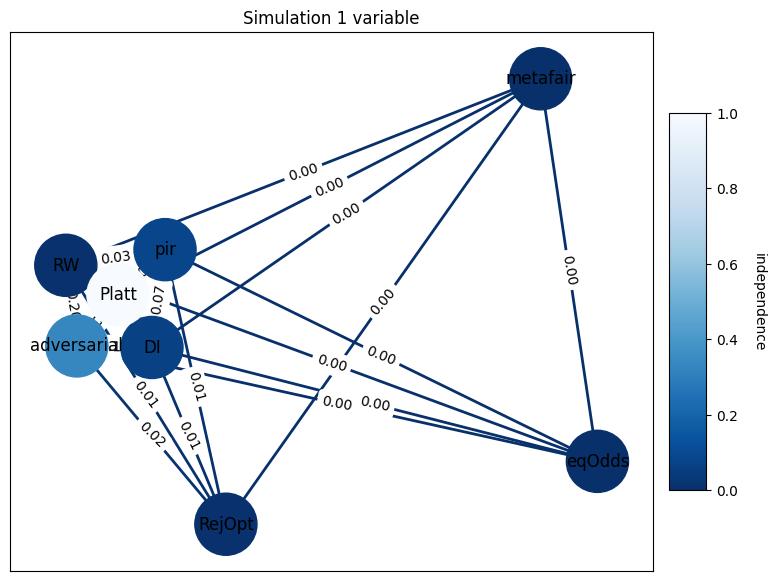

<Figure size 800x600 with 0 Axes>

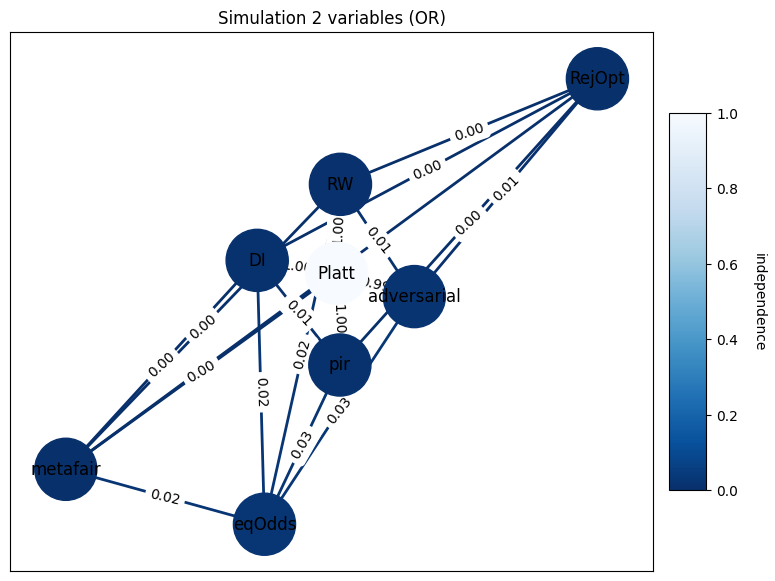

KeyError: 'Simulation2V_AND'

In [21]:
preproc = ['RW', 'DI']
inproc = ['metafair', 'pir', 'adversarial']
postproc = ['Platt', 'eqOdds', 'RejOpt']

proc = preproc + inproc + postproc

for metric in metrics:

    graph_visualization(
        medianResults['Simulation1V_ind'],
        medianResults['Simulation1V_com'],
        metric,
        title = "Simulation 1 variable",
        name_end =  metric + "/Median1V"
    )

    graph_visualization(
        medianResults['Simulation2V_OR_ind'],
        medianResults['Simulation2V_OR_com'],
        metric,
        title = "Simulation 2 variables (OR)",
        name_end = metric + "/Median2V_OR"
    )

    graph_visualization(
        medianResults['Simulation2V_AND'],
        medianResults['Simulation2V_AND'],
        metric,
        title = "Simulation 2 variables (AND)",
        name_end =  metric + "/Median2V_AND"
    )

    graph_visualization(
        medianResults['Simulation2V_XOR'],
        medianResults['Simulation2V_XOR'],
        metric,
        title = "Simulation 2 variables (XOR)",
        name_end =  metric + "/Median2V_XOR"
    )